AdaBoost 不仅可以用于分类问题，还可以用于回归分析。

我们先做个简单回忆，什么是分类，什么是回归呢？实际上分类和回归的本质是一样的，都是对未知事物做预测。不同之处在于输出结果的类型，分类输出的是一个离散值，因为物体的分类数有限的，而回归输出的是连续值，也就是在一个区间范围内任何取值都有可能。

这次我们的主要目标是使用 AdaBoost 预测房价，这是一个回归问题。除了对项目进行编码实战外，我希望你能掌握：

1、AdaBoost 工具的使用，包括使用 AdaBoost 进行分类，以及回归分析。

2、使用其他的回归工具，比如决策树回归，对比 AdaBoost 回归和决策树回归的结果。

**如何使用 AdaBoost 工具**

我们可以直接在 sklearn 中使用 AdaBoost。如果我们要用 AdaBoost 进行分类，需要在使用前引用代码：
```
from sklearn.ensemble import AdaBoostClassifier
```
我们之前讲到过，如果你看到了 Classifier 这个类，一般都会对应着 Regressor 类。AdaBoost 也不例外，回归工具包的引用代码如下：
```
from sklearn.ensemble import AdaBoostRegressor
```
我们先看下如何在 sklearn 中创建 AdaBoost 分类器。

我们需要使用```AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)```这个函数，其中有几个比较主要的参数，我分别来讲解下：

1、base_estimator：代表的是弱分类器。在 AdaBoost 的分类器和回归器中都有这个参数，在 AdaBoost 中默认使用的是决策树，一般我们不需要修改这个参数，当然你也可以指定具体的分类器。

2、n_estimators：算法的最大迭代次数，也是分类器的个数，每一次迭代都会引入一个新的弱分类器来增加原有的分类器的组合能力。默认是 50。

3、learning_rate：代表学习率，取值在 0-1 之间，默认是 1.0。如果学习率较小，就需要比较多的迭代次数才能收敛，也就是说学习率和迭代次数是有相关性的。当你调整 learning_rate 的时候，往往也需要调整 n_estimators 这个参数。

4、algorithm：代表我们要采用哪种 boosting 算法，一共有两种选择：SAMME 和 SAMME.R。默认是 SAMME.R。这两者之间的区别在于对弱分类权重的计算方式不同。

5、random_state：代表随机数种子的设置，默认是 None。随机种子是用来控制随机模式的，当随机种子取了一个值，也就确定了一种随机规则，其他人取这个值可以得到同样的结果。如果不设置随机种子，每次得到的随机数也就不同。

那么如何创建 AdaBoost 回归呢？

我们可以使用 ```AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss=‘linear’, random_state=None) ```这个函数。你能看出来回归和分类的参数基本是一致的，不同点在于回归算法里没有 algorithm 这个参数，但多了一个 loss 参数。

loss 代表损失函数的设置，一共有 3 种选择，分别为 linear、square 和 exponential，它们的含义分别是线性、平方和指数。默认是线性。一般采用线性就可以得到不错的效果。

创建好 AdaBoost 分类器或回归器之后，我们就可以输入训练集对它进行训练。我们使用 fit 函数，传入训练集中的样本特征值 train_X 和结果 train_y，模型会自动拟合。使用 predict 函数进行预测，传入测试集中的样本特征值 test_X，然后就可以得到预测结果。

**如何用 AdaBoost 对房价进行预测**

了解了 AdaBoost 工具包之后，我们看下 sklearn 中自带的波士顿房价数据集。

这个数据集一共包括了 506 条房屋信息数据，每一条数据都包括了 13 个指标，以及一个房屋价位。

13 个指标的含义，可以参考下面的表格：

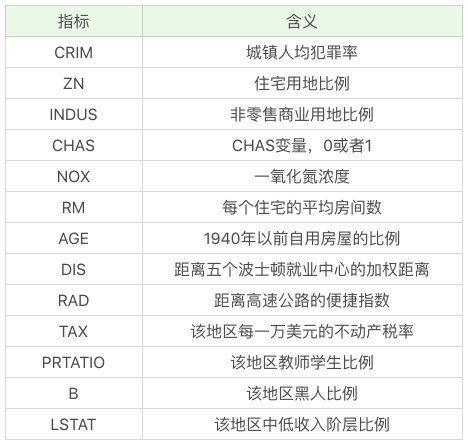

这些指标分析得还是挺细的，但实际上，我们不用关心具体的含义，要做的就是如何通过这 13 个指标推导出最终的房价结果。

如果你学习了之前的算法实战，这个数据集的预测并不复杂。

首先加载数据，将数据分割成训练集和测试集，然后创建 AdaBoost 回归模型，传入训练集数据进行拟合，再传入测试集数据进行预测，就可以得到预测结果。最后将预测的结果与实际结果进行对比，得到两者之间的误差。具体代码如下：

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor
# 加载数据
data=load_boston()
# 分割数据
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)
# 使用AdaBoost回归模型
regressor=AdaBoostRegressor()
regressor.fit(train_x,train_y)
pred_y = regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("房价预测结果 ", pred_y)
print("均方误差 = ",round(mse,2))

房价预测结果  [19.61666667 11.2745098  12.57352941 17.9621118  25.76967213 22.04573643
 27.40700637 18.02916667 29.476875   18.70666667 27.40700637 32.45454545
 12.01147541 25.71271186 13.24313725 25.71271186 17.9621118  16.75230769
 27.40700637 26.22410714 17.94205607 17.94205607 17.95454545 18.26617647
 32.56433121 17.94205607 21.91       25.71271186 12.01147541 29.74
 17.9621118  25.94720812 10.65526316 21.11914894 26.22410714 29.74
 26.20439024 12.01147541 15.         25.71271186 16.03089431 12.01147541
 29.71363636 17.94205607 26.73986928 18.02916667 18.26617647 19.42173913
 26.22410714 18.46896552 17.9621118  34.4030303  16.15590062 17.94205607
 25.94720812 20.41041667 25.47458564 17.32666667 26.22410714 22.19208633
 18.55748031 16.46865672 43.98666667 20.40877193 17.93793103 26.22410714
 25.76967213 12.01147541 18.08648649 27.02690058 22.19208633 18.02916667
 17.9621118  27.4076555  18.73333333 44.60645161 16.18208955 12.01147541
 17.7        25.71271186 20.40877193 15.45       12.643

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


这个数据集是比较规范的，我们并不需要在数据清洗，数据规范化上花太多精力，代码编写起来比较简单。

同样，我们可以使用不同的回归分析模型分析这个数据集，比如使用决策树回归和 KNN 回归。

编写代码如下：

In [3]:
from sklearn.tree import DecisionTreeRegressor

# 使用决策树回归模型
dec_regressor=DecisionTreeRegressor()
dec_regressor.fit(train_x,train_y)
pred_y = dec_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("决策树均方误差 = ",round(mse,2))
# 使用KNN回归模型
knn_regressor=KNeighborsRegressor()
knn_regressor.fit(train_x,train_y)
pred_y = knn_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("KNN均方误差 = ",round(mse,2))

决策树均方误差 =  23.43


NameError: name 'KNeighborsRegressor' is not defined

你能看到相比之下，AdaBoost 的均方误差更小，也就是结果更优。虽然 AdaBoost 使用了弱分类器，但是通过 50 个甚至更多的弱分类器组合起来而形成的强分类器，在很多情况下结果都优于其他算法。因此 AdaBoost 也是常用的分类和回归算法之一。

**AdaBoost 与决策树模型的比较**

在 sklearn 中 AdaBoost 默认采用的是决策树模型，我们可以随机生成一些数据，然后对比下 AdaBoost 中的弱分类器（也就是决策树弱分类器）、决策树分类器和 AdaBoost 模型在分类准确率上的表现。

如果想要随机生成数据，我们可以使用 sklearn 中的 make_hastie_10_2 函数生成二分类数据。假设我们生成 12000 个数据，取前 2000 个作为测试集，其余作为训练集。

有了数据和训练模型后，我们就可以编写代码。我设置了 AdaBoost 的迭代次数为 200，代表 AdaBoost 由 200 个弱分类器组成。针对训练集，我们用三种模型分别进行训练，然后用测试集进行预测，并将三个分类器的错误率进行可视化对比，可以看到这三者之间的区别：

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier
# 设置AdaBoost迭代次数
n_estimators=200
# 使用
X,y=datasets.make_hastie_10_2(n_samples=12000,random_state=1)
# 从12000个数据中取前2000行作为测试集，其余作为训练集
train_x, train_y = X[2000:],y[2000:]
test_x, test_y = X[:2000],y[:2000]
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)
# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)
# AdaBoost分类器
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,  train_y)
# 三个分类器的错误率可视化
fig = plt.figure()
# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err]*2,'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((n_estimators,))
# 遍历每次迭代的结果 i为迭代次数, pred_y为预测结果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
     # 统计错误率
    ada_err[i]=zero_one_loss(pred_y, test_y)
# 绘制每次迭代的AdaBoost错误率 
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()

<Figure size 640x480 with 1 Axes>

从图中你能看出来，弱分类器的错误率最高，只比随机分类结果略好，准确率稍微大于 50%。决策树模型的错误率明显要低很多。而 AdaBoost 模型在迭代次数超过 25 次之后，错误率有了明显下降，经过 125 次迭代之后错误率的变化形势趋于平缓。

因此我们能看出，虽然单独的一个决策树弱分类器效果不好，但是多个决策树弱分类器组合起来形成的 AdaBoost 分类器，分类效果要好于决策树模型。

**总结**

今天我带你用 AdaBoost 回归分析对波士顿房价进行了预测。因为这是个回归分析的问题，我们直接使用 sklearn 中的 AdaBoostRegressor 即可。如果是分类，我们使用 AdaBoostClassifier。

另外我们将 AdaBoost 分类器、弱分类器和决策树分类器做了对比，可以看出经过多个弱分类器组合形成的 AdaBoost 强分类器，准确率要明显高于决策树算法。所以 AdaBoost 的优势在于框架本身，它通过一种迭代机制让原本性能不强的分类器组合起来，形成一个强分类器。

其实在现实工作中，我们也能找到类似的案例。IBM 服务器追求的是单个服务器性能的强大，比如打造超级服务器。而 Google 在创建集群的时候，利用了很多 PC 级的服务器，将它们组成集群，整体性能远比一个超级服务器的性能强大。

再比如我们讲的“三个臭皮匠，顶个诸葛亮”，也就是 AdaBoost 的价值所在。

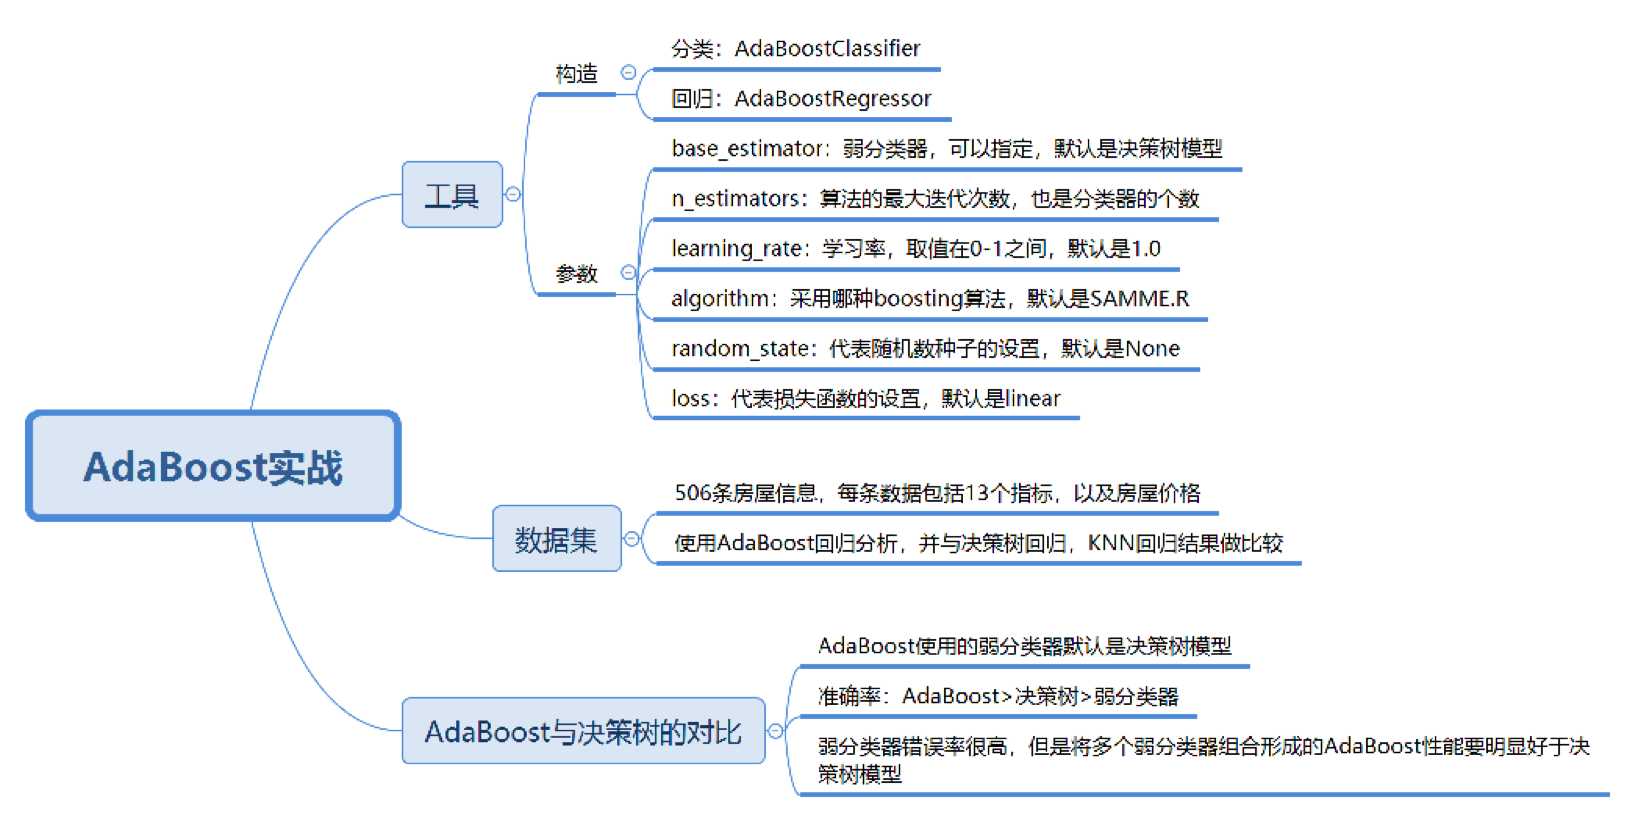

今天我们用 AdaBoost 分类器与决策树分类做对比的时候，使用到了 sklearn 中的 make_hastie_10_2 函数生成数据。实际上在我们对泰坦尼克号的乘客做生存预测的时候，也讲到了决策树工具的使用。你能不能编写代码，使用 AdaBoost 算法对泰坦尼克号乘客的生存做预测，看看它和决策树模型，谁的准确率更高？

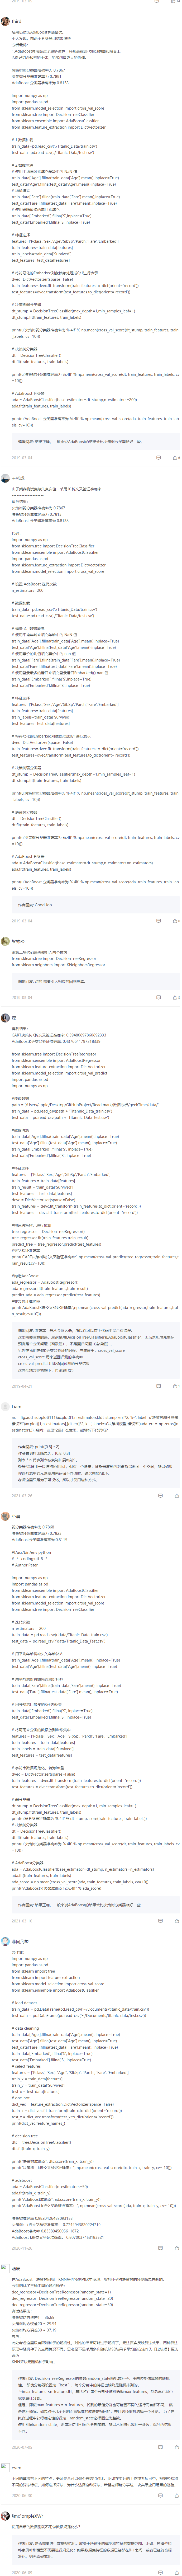